### **Using Bank Dataset**

### **Step 1 : Load the Data**

In [3]:
import pandas as pd 

# Load dataset
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\bank+marketing\\bank-additional\\bank-additional-full.csv", sep = ";")

# First few rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### **Step 2 : Understand the problem and target variable**
##### **- We are trying to predict whether a customer will purchase a product (y column), which is binary classification problem**
##### **y = 'yes' -> customer subscribed**
##### **n = 'no' -> customer did not subscribe**

In [5]:
df['y'].value_counts(normalize = True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

##### **- The target variable 'y' is highly imbalanced - ~89% of clients did not subscribed, and only 11% did.**
##### **- This class imbalance may affect model performane**

### **Step 3 : Basic Data Exploration**

In [8]:
# 1. Shape of the dataset
print("Dataset Shape : ")
print(df.shape)

Dataset Shape : 
(41188, 21)


In [9]:
# 2. Data types and non-null counts
print("\nInfo : ")
print(df.info())


Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 

In [10]:
# 3. First 5 rows
print("\nSample Data : ")
print(df.head())


Sample Data : 
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribo

In [11]:
# 4. Summary Statistics
print("\nSummary Statistics : ")
print(df.describe())


Summary Statistics : 
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.57

In [12]:
# 5. Check for missing values
print("\nMissing Values : ")
print(df.isnull().sum())


Missing Values : 
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


##### **- Shape : The dataset has 41,188 rows and 21 columns**
##### **- No missing values : the data is clean and complete**
##### **- Target column 'y' is categorical with values like "yes" and "no"**

### **Step 4 : Data Preprocessing**

#### **4.1 : Drop the 'duration' column**

In [16]:
df = df.drop(columns = ['duration'])

#### **4.2 : Encode the target column 'y'**
##### **- Convert the target variable from 'yes' and 'no' to 1 and 0**

In [18]:
df['y'] = df['y'].map({'yes' : 1, 'no' : 0})

#### **4.3 : Split into Feature (X) and Target (y)**

In [20]:
X = df.drop(columns = ['y'])
y = df['y']

#### **4.4 : Encode categorical features**
##### **- There are many categorical columns, like 'job', 'marital', 'education'**
##### **- Lets use one-hot encoding to convert them into numeric format**

In [22]:
X_encoded = pd.get_dummies(X, drop_first = True)

### **Step 5 : Train-Test Split & Model Training**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42, stratify = y)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix : ", confusion_matrix(y_test, y_pred))
print("\nClassification Report : ", classification_report(y_test, y_pred))

Accuracy :  0.8402524884680748

Confusion Matrix :  [[6612  698]
 [ 618  310]]

Classification Report :                precision    recall  f1-score   support

           0       0.91      0.90      0.91      7310
           1       0.31      0.33      0.32       928

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.85      0.84      0.84      8238



##### **- The model is trained using a Decision Tree Classifier on a balanced train-test split**
##### **- Evaluation metrics help understand model accuracy , precision/recall, and how well it handles class imbalance**

### **Step 6 : Model Tuning & Feature Importance**

#### **6.1 : Hyperparameter Tuning**

In [43]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth' : [3, 5, 10, None], 
    'min_samples_split' : [2, 5, 10]
}

# Grid Search with Cross-Validation
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

# Best Model
best_clf = grid.best_estimator_

# Predictions
y_pred_best = best_clf.predict(X_test)

# Evaluation
print("Tuned Accuracy : ", accuracy_score(y_test, y_pred_best))
print("\nClassification Report : ", classification_report(y_test, y_pred_best))

Tuned Accuracy :  0.9007040543821316

Classification Report :                precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.73      0.19      0.30       928

    accuracy                           0.90      8238
   macro avg       0.82      0.59      0.62      8238
weighted avg       0.89      0.90      0.87      8238



##### **- Model achieved 90% accuracy, but performance on class '1' (positive class) is poor (F1-score = 0.30), indicating class imbalance**
##### **- High racall for class 0 (negative class) shows its dominant, while many positive cases are misclassified**

#### **6.2 : Feature Importance**

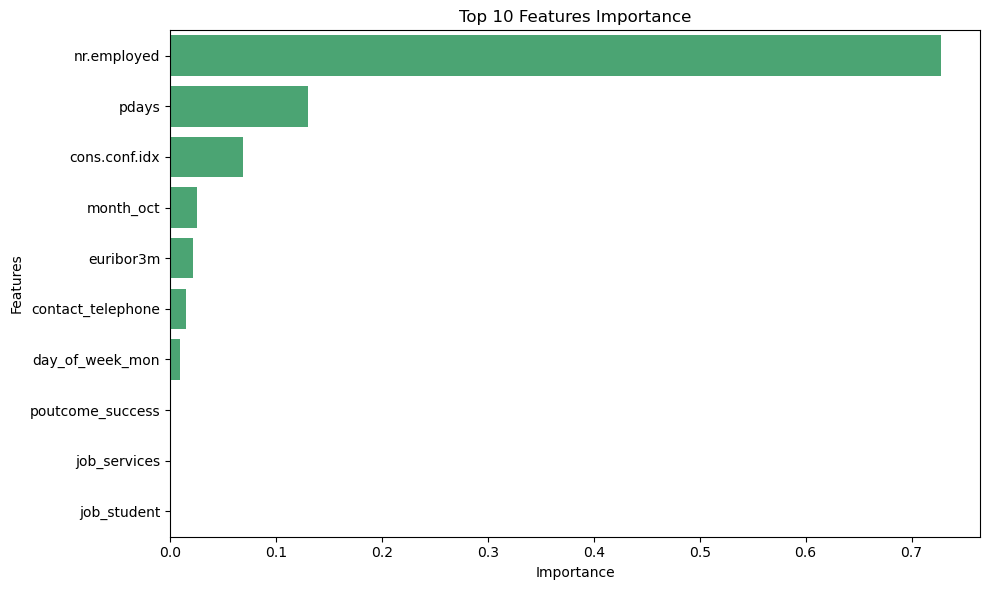

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
importances = best_clf.feature_importances_
features = X_train.columns
indices = importances.argsort()[::-1]

plt.figure(figsize = (10, 6))
sns.barplot(x = importances[indices][:10], y = features[indices][:10], color = 'mediumseagreen')
plt.title("Top 10 Features Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

##### **- 'nr.employed' is the most important predictor, showing a strong influence on subscription outcome**
##### **- Other features like 'pdays' and 'cons.conf.idx' have moderate impact, while the rest contribute minimally**

#### **6.3 : Predict on Test Data & Evaluate Final model**

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define model
rf = RandomForestClassifier()

# Define hyperparameters
param_dist = {
    'n_estimators' : [100, 200, 300], 'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10], 'min_samples_leaf' : [1, 2, 4]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions = param_dist, 
    n_iter = 10, cv = 3, verbose = 1, n_jobs = -1
)

# Fit the model
random_search.fit(X_train, y_train)

# Assign the best model
rf_best = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [70]:
# Assign best estimator after tuning
rf_best = random_search.best_estimator_

# Predict on the test set
y_pred_test = rf_best.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Test Accuracy : ", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix : ", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report : ", classification_report(y_test, y_pred_test))

Test Accuracy :  0.9011896091284293

Confusion Matrix :  [[7228   82]
 [ 732  196]]

Classification Report :                precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.71      0.21      0.33       928

    accuracy                           0.90      8238
   macro avg       0.81      0.60      0.64      8238
weighted avg       0.89      0.90      0.88      8238



##### **- Tuned Random Forest achieved a test accuracy of 90.1%, showing strong overall performance**
##### **- However, the model still struggles with class 1 (positive class), achieving only 21% recall, indicating room for improvement in detecting positive responses**

### **Step 8 : Cross-Validation (with 'cross_val_score')**

In [74]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation on the best model
cv_scores = cross_val_score(rf_best, X_train, y_train, cv = 5, scoring = 'accuracy')

# Display scores
print("Cross-Validation Accuracy Scores : ", cv_scores)
print("Mean CV Accuracy : ", np.mean(cv_scores))

Cross-Validation Accuracy Scores :  [0.90212443 0.9016692  0.89924127 0.89787557 0.89787557]
Mean CV Accuracy :  0.8997572078907435


##### **- The model demonstrates consistent accuracy across folds, indicating good generalization performance**
##### **- Mean CV accuracy (~90%) confirms that the model is reliable and not overfitting**